In [63]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train) , (x_test,y_test) = load_data(path = "mnist.npz")

In [64]:
print(x_train.shape, y_train.shape)
print(y_train) # 0 ~ 9
print(x_test.shape, y_test.shape)
print(y_test) # 0 ~ 9

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


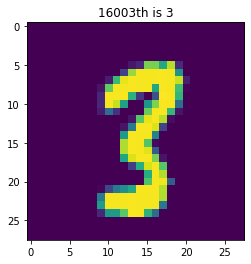

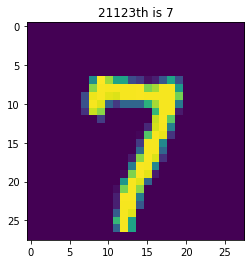

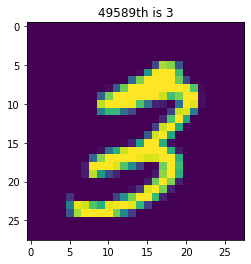

In [65]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3

random_idx = np.random.randint(60000,size=sample_size)

for idx in random_idx :
    img = x_train[idx,:]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title("{idx}th is {label}".format(idx=idx,label=label))

In [66]:
#검증 데이터 만들기
from sklearn.model_selection import train_test_split

x_train , x_val , y_train , y_val = train_test_split(x_train,y_train,test_size=0.3,random_state= 777)
print("학습 데이터 {} 학습 레이블 {}".format(x_train.shape,y_train.shape))
print("검증 데이터 {} 검증 레이블 {}".format(x_val.shape,y_val.shape))

학습 데이터 (42000, 28, 28) 학습 레이블 (42000,)
검증 데이터 (18000, 28, 28) 검증 레이블 (18000,)


In [67]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 전처리 과정 (그래디언트 손실과 그래디언트 폭발로 학습이 진행되지 않는걸 방지하기 위해서)
x_train = (x_train.reshape((num_x_train,28*28)))/ 255
x_val = (x_val.reshape((num_x_val,28*28)))/255
x_test = (x_test.reshape((num_x_test,28*28)))/255
# 픽셀 범위 0~255 에 따라 minmax 알고리즘으로 정규화(normalization)
print(x_train.shape)

(42000, 784)


In [68]:
# 모델의 마지막층에 소프트맥스 Softmax 함수를 사용하기 때문에 Y 데이터를 범주형 데이터로 변환
from tensorflow.keras.utils import to_categorical
print(y_train)
y_train = to_categorical(y_train)

y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[2 7 6 ... 3 4 5]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [69]:
#모델 구성

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#첫번째 층에는 입력 형태 설정
model.add(Dense(64,activation = "relu", input_shape= (784,))) # 64개의 출력을 가지는 층
model.add(Dense(32,activation ="relu")) # 32개의 출력을 가지는 층
model.add(Dense(10,activation = "softmax")) # 10r개의 출력 -> 범주형 데이터 이므로 sotfmax 


In [70]:
# 학습과정 설정
model.compile(optimizer = "adam" , 
                loss = "categorical_crossentropy",
             metrics=['acc'])
print(x_train.shape)
history = model.fit(x_train,y_train,
                   epochs=30,
#                    batch_size=128,
                   validation_data=(x_val,y_val))
history

(42000, 784)
Epoch 1/30
1313/1313 [==============================] - 1s 890us/step - loss: 0.3444 - acc: 0.9016 - val_loss: 0.1944 - val_acc: 0.9433
Epoch 2/30
1313/1313 [==============================] - 1s 826us/step - loss: 0.1523 - acc: 0.9560 - val_loss: 0.1457 - val_acc: 0.9557
Epoch 3/30
1313/1313 [==============================] - 1s 791us/step - loss: 0.1111 - acc: 0.9671 - val_loss: 0.1234 - val_acc: 0.9622
Epoch 4/30
1313/1313 [==============================] - 1s 850us/step - loss: 0.0868 - acc: 0.9739 - val_loss: 0.1168 - val_acc: 0.9644
Epoch 5/30
1313/1313 [==============================] - 1s 813us/step - loss: 0.0688 - acc: 0.9788 - val_loss: 0.1118 - val_acc: 0.9666
Epoch 6/30
1313/1313 [==============================] - 1s 794us/step - loss: 0.0579 - acc: 0.9820 - val_loss: 0.1163 - val_acc: 0.9657
Epoch 7/30
1313/1313 [==============================] - 1s 805us/step - loss: 0.0489 - acc: 0.9845 - val_loss: 0.1161 - val_acc: 0.9684
Epoch 8/30
1313/1313 [=============

In [71]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

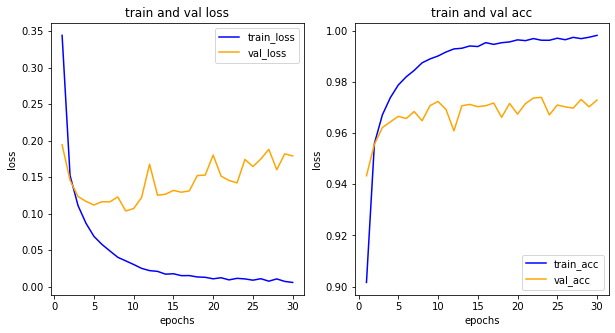

In [80]:
#학습 결과 시각화
import matplotlib.pyplot as plt

his_dict = history.history
loss= his_dict["loss"]
val_loss = his_dict["val_loss"]

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize= (10,5))

#학습 및 검증 손실 그리기
ax1= fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color="blue", label = "train_loss")
ax1.plot(epochs, val_loss, color = "orange", label = "val_loss")
ax1.set_title("train and val loss")
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.legend()

acc = his_dict['acc']
val_acc= his_dict['val_acc']

#학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc ,color ="blue",label="train_acc")
ax2.plot(epochs, val_acc, color = "orange", label = "val_acc")
ax2.set_title("train and val acc")
ax2.set_xlabel("epochs")
ax2.set_ylabel("loss")
ax2.legend()
plt.show()
# 아래의 두 그래프가 epochs가 올라갈수록 벌어지고 있다 = Overfitting 이 이러나고 있다

In [81]:
#모델 평가
model.evaluate(x_test,y_test) 

313/313 [==============================] - 0s 467us/step - loss: 0.1705 - acc: 0.9751


[0.17049767076969147, 0.9750999808311462]

In [83]:
#값 예측 
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7) # 소수점 제한\
print("각 클래스에 속할 확률 : \n{}".format(results[0]))

(10000, 10)
각 클래스에 속할 확률 : 
[3.1812139e-20 1.1548703e-12 2.0829397e-12 3.0723443e-06 2.3686143e-23
 1.0507659e-15 1.2672181e-24 9.9999690e-01 1.9635030e-13 4.8986752e-12]


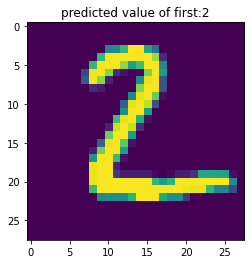

[7 2 1 ... 4 5 6]


In [99]:
#에측 값 그리기

import matplotlib.pyplot as plt

arg_results = np.argmax(results,axis=-1)
plt.imshow(x_test[1].reshape(28,28))
plt.title("predicted value of first:"+str(arg_results[1]))
plt.show()
print(arg_results)

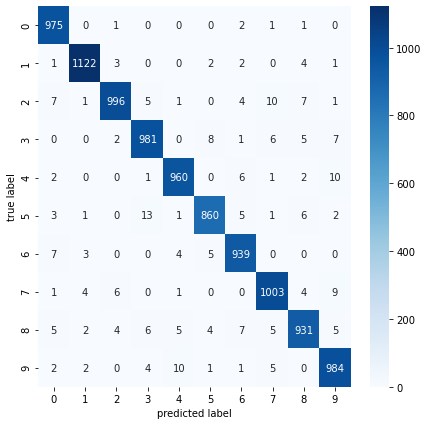

In [104]:
# sklearn.metrics 로 평가지표 나타내기
from sklearn.metrics import classification_report , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# confusion matrix 생성
plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test,axis=-1),np.argmax(results,axis=-1))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

In [106]:
# classification report 분류보고서 생성
print('\n', classification_report(np.argmax(y_test,axis=-1),np.argmax(results,axis=-1)))


               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000

